In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [46]:
%matplotlib inline

In [47]:
canada = pd.read_csv('canada.csv')
canada.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [48]:
x = canada.drop('per capita income (US$)', axis='columns')
y = canada['per capita income (US$)']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [50]:
reg = linear_model.LinearRegression()
reg = reg.fit(x_train, y_train)

In [51]:
reg.predict(x_test)

array([20349.94572643, 18613.49135581, 33373.35350612, 29900.44476487,
        1248.94764955,  2117.17483487, 24691.081653  , 27295.76320894,
       38582.716618  , 22086.40009706])

In [52]:
reg.score(x_test, y_test)

0.8003604166786615

In [53]:
reg.predict([[2020]])

c:\Users\Polina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42923.85254456])

WITHOUT TESTING MODELS

In [54]:
reg = linear_model.LinearRegression()
reg = reg.fit(canada[['year']], canada[['per capita income (US$)']])
reg.predict([[2020]])

c:\Users\Polina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

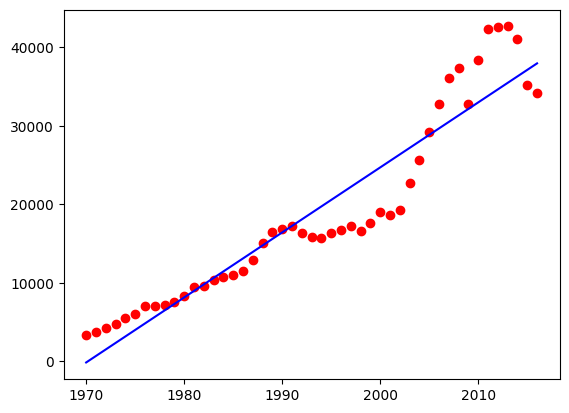

In [55]:
reg = reg.fit(canada[['year']], canada[['per capita income (US$)']])
plt.scatter(canada.year, canada['per capita income (US$)'], color = 'red')
plt.plot(canada.year, reg.predict(canada[['year']]), color = 'blue' )
plt.show()

In [56]:
hiring_data = pd.read_csv('hiring.csv')
hiring_data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [57]:
from word2number import w2n
import math
hiring_data['experience'] = hiring_data['experience'].fillna('zero')
hiring_data['experience'] = hiring_data['experience'].apply(w2n.word_to_num)
hiring_data['test_score(out of 10)'] = hiring_data['test_score(out of 10)'].fillna(math.floor(hiring_data['test_score(out of 10)'].median()))
hiring_data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [58]:
hiring_data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [62]:
reg = linear_model.LinearRegression()
reg.fit(hiring_data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values, hiring_data[['salary($)']])

LinearRegression()

In [63]:
reg.predict([[2,9,6]])

array([[53205.96797671]])

In [64]:
reg.predict([[12,10,10]])

array([[92002.18340611]])